### Introduction and Project Overview

This project focuses on predicting optimal crop types based on soil properties using a dataset that includes various soil measurements. The objective is to apply machine learning techniques to understand how different soil properties influence crop viability and to build a predictive model that can guide agricultural decisions.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import seaborn as sns
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [34]:
# Load and preprocess the dataset
crops = pd.read_csv("soil_measures.csv")

In [35]:
# Initial exploration: structure and summary statistics
print(crops.head(10))  
print(crops.describe()) 

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
5  69  37  42  7.073454  rice
6  69  55  38  5.700806  rice
7  94  53  40  5.718627  rice
8  89  54  38  6.685346  rice
9  68  58  38  6.336254  rice
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


In [36]:
# Data quality checks to ensure robustness of the model
missing_values = crops.isna().sum().sort_values()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [37]:
# Distribution of target variable
unique_crops = crops['crop'].unique()
print(f"Unique crop types in the dataset: {len(unique_crops)}")

Unique crop types in the dataset: 22


In [38]:
# Splitting the dataset into training and testing sets
X = crops[["N", "P", "K", "ph"]]
y = crops["crop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# StandardScaler
scaler = StandardScaler()

# Fit and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Features F1 Score
feature_performance = {}
for feature in ["N", "P", "K", "ph"]:
    # Training a model for each feature to understand its importance
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    log_reg.fit(X_train_scaled[:, [X_train.columns.get_loc(feature)]], y_train)
    
    # Predicting and evaluating using F1-score to balance precision and recall
    y_pred = log_reg.predict(X_test_scaled[:, [X_test.columns.get_loc(feature)]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    feature_performance[feature] = f1
    print(f"F1-score for predicting crop type using {feature} alone: {f1:.4f}")


F1-score for predicting crop type using N alone: 0.1069
F1-score for predicting crop type using P alone: 0.0843
F1-score for predicting crop type using K alone: 0.1383
F1-score for predicting crop type using ph alone: 0.0455


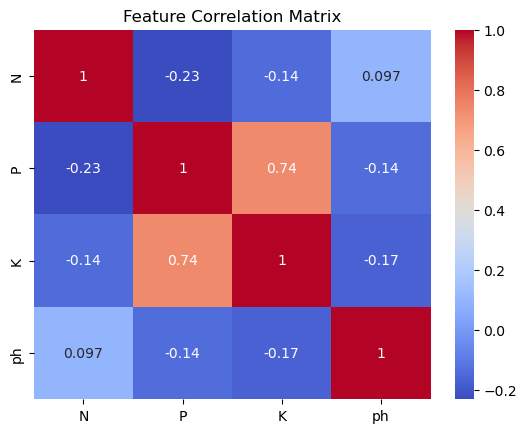

In [42]:
# Feature correlation
crops_corr = X.corr()
sns.heatmap(crops_corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [43]:
# Feature selection 
final_features = ["N", "K", "ph"]

In [44]:
# Training the final model with selected and scaled features
X_train_final = X_train_scaled[:, [X_train.columns.get_loc(f) for f in final_features]]
X_test_final = X_test_scaled[:, [X_test.columns.get_loc(f) for f in final_features]]
final_model = LogisticRegression(max_iter=2000, multi_class="multinomial")
final_model.fit(X_train_final, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [45]:
# Model evaluation 
y_pred_final = final_model.predict(X_test_final)
final_f1_score = f1_score(y_test, y_pred_final, average="weighted")
print(f"Final Model F1-score: {final_f1_score:.4f}")

Final Model F1-score: 0.4986


Classification Report:
               precision    recall  f1-score   support

       apple       0.73      0.35      0.47        23
      banana       0.79      0.71      0.75        21
   blackgram       0.52      0.55      0.54        20
    chickpea       1.00      0.69      0.82        26
     coconut       0.70      0.26      0.38        27
      coffee       0.62      0.59      0.61        17
      cotton       0.80      0.94      0.86        17
      grapes       0.42      0.79      0.55        14
        jute       0.50      0.48      0.49        23
 kidneybeans       0.33      0.65      0.44        20
      lentil       0.16      0.36      0.22        11
       maize       0.87      0.95      0.91        21
       mango       0.32      0.53      0.40        19
   mothbeans       0.29      0.08      0.13        24
    mungbean       0.33      0.11      0.16        19
   muskmelon       0.35      0.35      0.35        17
      orange       0.52      0.86      0.65        14
   

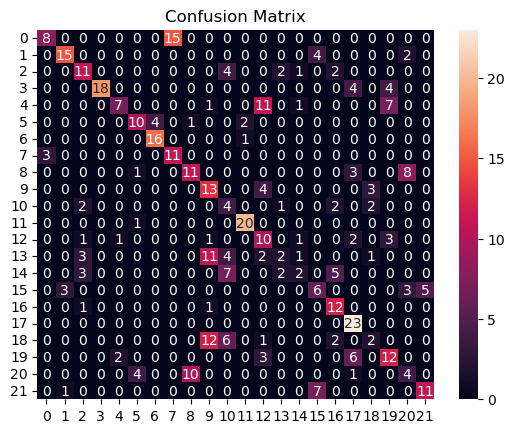

In [46]:
# Detailed performance analysis
print("Classification Report:\n", classification_report(y_test, y_pred_final))
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()